In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

load data


In [ ]:
TitanicData=pd.read_csv('/content/tested.csv')

print 1st (5 rows)


In [ ]:
TitanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


informations about data

In [ ]:
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


check missing values

In [ ]:
TitanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

handle missing values

In [ ]:
TitanicData['Age'].fillna(TitanicData['Age'].mean(), inplace=True)

TitanicData = TitanicData.drop(columns = 'Cabin' , axis = 1)


statistical measures

In [ ]:
TitanicData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


people survived and not survived

In [ ]:
TitanicData['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

In [ ]:
sns.set()

visualization for data

<Axes: xlabel='Survived', ylabel='count'>

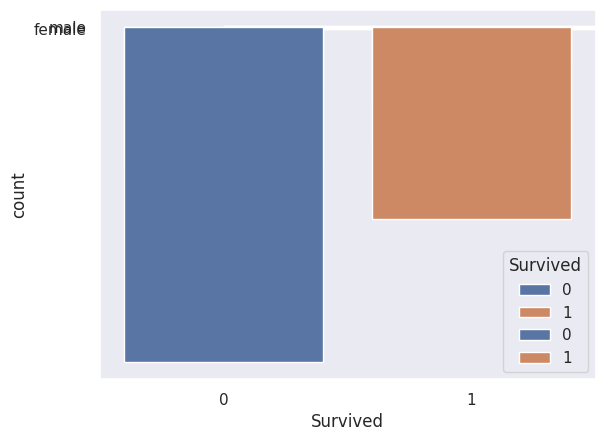

In [ ]:
TitanicData['Sex'].value_counts()
sns.countplot(x='Pclass', hue='Survived', data=TitanicData)
sns.countplot(x='Pclass', data=TitanicData)
sns.countplot(y='Sex', hue='Survived', data=TitanicData)
sns.countplot(y='Sex', data=TitanicData)
sns.countplot(x='Survived', data=TitanicData)


In [ ]:
TitanicData['Sex'].value_counts()


male      266
female    152
Name: Sex, dtype: int64

In [ ]:
TitanicData['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

convert categorical columns

In [ ]:
TitanicData.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
X = TitanicData.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = TitanicData['Survived']
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


split data into training and test data

In [ ]:

TitanicData.isnull().sum().any()


True

In [ ]:
TitanicData.dropna(inplace=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


logistic regression

In [ ]:

# Combine X_train and Y_train into a single DataFrame
train_data = pd.concat([X_train, Y_train], axis=1)

# Remove rows with missing values
train_data_clean = train_data.dropna()

# Split the cleaned data back into X_train and Y_train
X_train_clean = train_data_clean.drop('Survived', axis=1)  # Replace 'target_column' with your actual target column name
Y_train_clean = train_data_clean['Survived']

# Now, you can use X_train_clean and Y_train_clean for training
model.fit(X_train_clean, Y_train_clean)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
training_data_accuracy = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, training_data_accuracy)
print('Accuracy of training data :', training_data_accuracy)

Accuracy of training data : [0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]
